In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn  as sns

In [2]:
df=pd.read_csv('IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Data Visualization

In [4]:
df['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [5]:
df['sentiment'][1]

'positive'

In [6]:
df['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [7]:
df['sentiment'][1]

'positive'

In [8]:
df['sentiment'].replace('positive',1,inplace=True)
df['sentiment'].replace('negative',1,inplace=True)

In [9]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


<AxesSubplot: xlabel='sentiment', ylabel='count'>

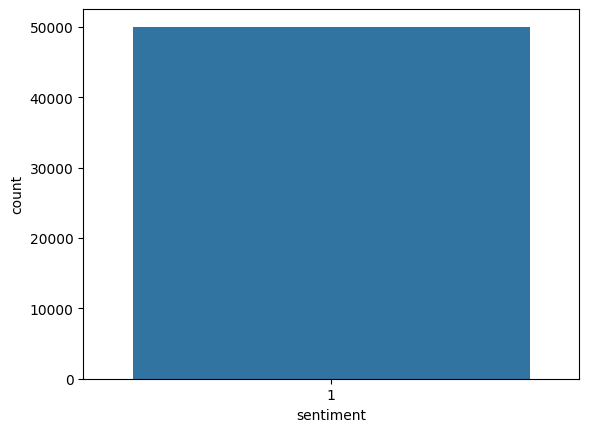

In [10]:
sns.countplot(x='sentiment', data=df)

<AxesSubplot: xlabel='sentiment'>

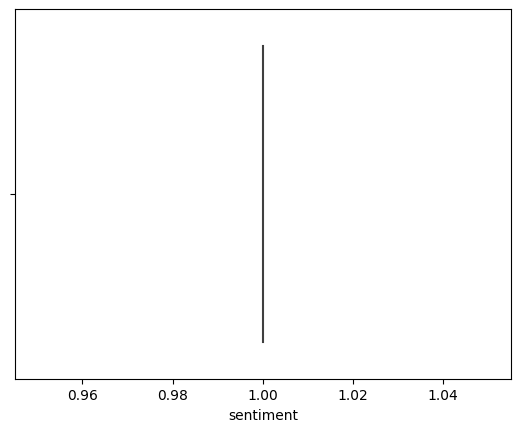

In [11]:
sns.violinplot(x='sentiment',data=df)

### Data Preprocessing

In [12]:
columns=[]
for i in df.columns:
    columns.append(i)
    print(columns)

['review']
['review', 'sentiment']


In [13]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [14]:
df.shape

(50000, 2)

In [15]:
df.describe()

,sentiment
count,50000.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [17]:
big=df['review'][0]
for i in df['review']:
 if len(i)> len(big):
    big=i
    print(big)

So im not a big fan of Boll's work but then again not many are. I enjoyed his movie Postal (maybe im the only one). Boll apparently bought the rights to use Far Cry long ago even before the game itself was even finsished. <br /><br />People who have enjoyed killing mercs and infiltrating secret research labs located on a tropical island should be warned, that this is not Far Cry... This is something Mr Boll have schemed together along with his legion of schmucks.. Feeling loneley on the set Mr Boll invites three of his countrymen to play with. These players go by the names of Til Schweiger, Udo Kier and Ralf Moeller.<br /><br />Three names that actually have made them selfs pretty big in the movie biz. So the tale goes like this, Jack Carver played by Til Schweiger (yes Carver is German all hail the bratwurst eating dudes!!) However I find that Tils acting in this movie is pretty badass.. People have complained about how he's not really staying true to the whole Carver agenda but we on

In [18]:
small=df['review'][0]
for i in df['review']:
 if len(i)> len(big):
    big=i
    print(small)

In [19]:
for i in range(len(df['review'])):
  if df["review"][i] == "Read the book, forget the movie!":
    print('The smallest review is at index',i)

The smallest review is at index 27521


In [20]:
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


##### NLP

In [21]:
from tensorflow import  keras
from keras.preprocessing.text import Tokenizer

In [22]:
x=df['review']
y=df['sentiment']

In [23]:
tokenizer=Tokenizer(1000, lower=True)
tokenizer.fit_on_texts(x)
x[1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [24]:
sequence=tokenizer.texts_to_sequences(x)
sequence[1]

[3,
 393,
 120,
 353,
 7,
 7,
 1,
 6,
 52,
 52,
 155,
 55,
 2,
 411,
 3,
 2,
 530,
 282,
 4,
 5,
 1,
 438,
 412,
 7,
 7,
 1,
 150,
 23,
 568,
 69,
 498,
 21,
 61,
 45,
 189,
 29,
 1,
 18,
 28,
 45,
 29,
 1,
 175,
 96,
 22,
 67,
 371,
 63,
 1,
 791,
 31,
 1,
 5,
 21,
 61,
 6,
 9,
 69,
 278,
 1,
 147,
 18,
 9,
 6,
 3,
 407,
 2,
 412,
 3,
 353,
 42,
 27,
 4,
 1,
 78,
 4,
 202,
 2,
 24,
 114,
 7,
 7,
 1,
 62,
 270,
 344,
 16,
 1,
 120,
 177,
 1,
 4,
 1,
 60,
 248,
 71,
 356,
 1,
 91,
 9,
 297,
 20,
 260,
 2,
 260,
 583,
 16,
 1,
 134,
 2,
 2,
 1,
 730,
 583,
 4,
 65,
 16,
 170,
 23,
 69,
 221]

In [25]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [26]:
encoded_sequence = pad_sequences(sequence,maxlen=200,padding='pre')
encoded_sequence[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   3, 393, 120, 353,   7,   7,   1,   6,  52,  52, 155,  55,
         2, 411,   3,   2, 530, 282,   4,   5,   1, 438, 412,   7,   7,
         1, 150,  23, 568,  69, 498,  21,  61,  45, 189,  29,   1,  18,
        28,  45,  29,   1, 175,  96,  22,  67, 371,  63,   1, 791,  31,
         1,   5,  21,  61,   6,   9,  69, 278,   1, 147,  18,   9,   6,
         3, 407,   2, 412,   3, 353,  42,  27,   4,   1,  78,   4, 202,
         2,  24, 114,   7,   7,   1,  62, 270, 344,  16,   1, 120, 177,
         1,   4,   1,  60, 248,  71, 356,   1,  91,   9, 297,  2

In [27]:
final_input=encoded_sequence
final_output=np.array(y)
final_output

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [28]:
from sklearn.model_selection import  train_test_split
x_test, x_train ,y_test, y_train =train_test_split(final_input, final_output, test_size=0.33, random_state=42)

In [29]:
from keras.models import Sequential
from keras.layers import LSTM,Bidirectional,Dropout,Dense,Embedding


In [30]:
model =Sequential()
model.add(
    Embedding(
      input_dim=10000,
        output_dim=120,
        input_length=200,
    ),)
 

In [31]:
model.add(
    Bidirectional(LSTM(64, return_sequences=True))
)
model.add(Bidirectional(LSTM(32)))

In [32]:
model.add(Dense(1))

model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

prediction = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=2,batch_size=32)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 120)          1200000   
                                                                 
 bidirectional (Bidirectiona  (None, 200, 128)         94720     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1,336,001
Trainable params: 1,336,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
516/516 [===========================

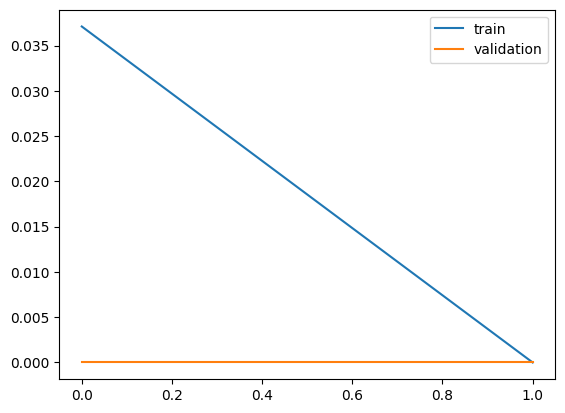

In [33]:
plt.plot(prediction.history['loss'],label='train')
plt.plot(prediction.history['val_loss'],label='validation')
plt.legend(loc='best')
plt.show()


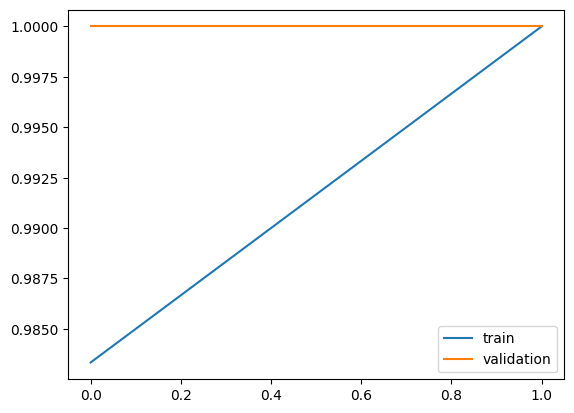

In [34]:
plt.plot(prediction.history['accuracy'],label='train')
plt.plot(prediction.history['val_accuracy'],label='validation')
plt.legend(loc='best')
plt.show()

model.save("imdb review.h5")


In [41]:
def imdb_bot(review):
    statement_list=[]
    statement_list.append(review)
    sequence=tokenizer.texts_to_sequences(statement_list)
    input=pad_sequences(sequence,maxlen=200, padding='pre')
    output= model.predict(input)
    if output.all() == 1:
        print("The reviews are good you should watch this")
    else:
        print("The reviews are not quite good you should try another one")

imdb_bot("tees maar khan")

imdb_bot("All salman khan movies")

imdb_bot("justice leauge dark appokalips war")

1/1 [==============================] - 0s 35ms/step
The reviews are good you should watch this
1/1 [==============================] - 0s 33ms/step
The reviews are good you should watch this
1/1 [==============================] - 0s 33ms/step
The reviews are good you should watch this
